In [8]:
pip install --upgrade matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB 825.8 kB/s eta 0:00:10
   ---------------------------------------- 0.1/7.8 MB 770.8 kB/s eta 0:00:11
    --------------------------------------- 0.2/7.8 MB 984.6 kB/s eta 0:00:08
    --------------------------------------- 0.2/7.8 MB 985.7 kB/s eta 0:00:08
   - -------------------------------------- 0.3/7.8 MB 983.0 kB/s eta 0:00:08
   - -------------------------------------- 0.3/7.8 MB 947.5 kB/s eta 0:00:08
   - -------------------------------------- 0.4/7.8 MB 1.0 MB/s eta 0:00:08
   - -------------------------------------- 0.4/7.8 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/7.8 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/7.8 MB 1.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/7.8 MB 983.5 kB/s eta 0:00:08
   -- ------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
ids = pd.read_csv("UNSW-NB15_1.csv")

C:\Users\vivek\AppData\Local\Temp\ipykernel_2404\1316157946.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  ids = pd.read_csv("UNSW-NB15_1.csv")


In [3]:
ids[['dstip1', 'dstip2', 'dstip3', 'dstip4']] = ids['dstip'].str.split('.', expand=True).astype(int)

In [4]:
ids[['srcip1', 'srcip2', 'srcip3', 'srcip4']] = ids['srcip'].str.split('.', expand=True).astype(int)

In [5]:
ids = ids.drop(columns=['dstip'])

In [6]:
ids = ids.drop(columns=['srcip'])

In [11]:
ids.head()

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,attack_cat,Label,dstip1,dstip2,dstip3,dstip4,srcip1,srcip2,srcip3,srcip4
0,33661,1024,udp,CON,0.036133,528,304,31,29,0,...,NaN,0,149,171,126,9,59,166,0,0
1,1464,53,udp,CON,0.001119,146,178,31,29,0,...,NaN,0,149,171,126,7,59,166,0,6
2,3593,53,udp,CON,0.001209,132,164,31,29,0,...,NaN,0,149,171,126,5,59,166,0,5
3,49664,53,udp,CON,0.001169,146,178,31,29,0,...,NaN,0,149,171,126,0,59,166,0,3
4,32119,111,udp,CON,0.078339,568,312,31,29,0,...,NaN,0,149,171,126,9,59,166,0,0


In [12]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sport             700000 non-null  object 
 1   dsport            700000 non-null  object 
 2   proto             700000 non-null  object 
 3   state             700000 non-null  object 
 4   dur               700000 non-null  float64
 5   sbytes            700000 non-null  int64  
 6   dbytes            700000 non-null  int64  
 7   sttl              700000 non-null  int64  
 8   dttl              700000 non-null  int64  
 9   sloss             700000 non-null  int64  
 10  dloss             700000 non-null  int64  
 11  service           700000 non-null  object 
 12  Sload             700000 non-null  float64
 13  Dload             700000 non-null  float64
 14  Spkts             700000 non-null  int64  
 15  Dpkts             700000 non-null  int64  
 16  swin              70

In [13]:
ids.shape

(700000, 55)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [15]:
ids.shape

(700000, 55)

Heat-Map


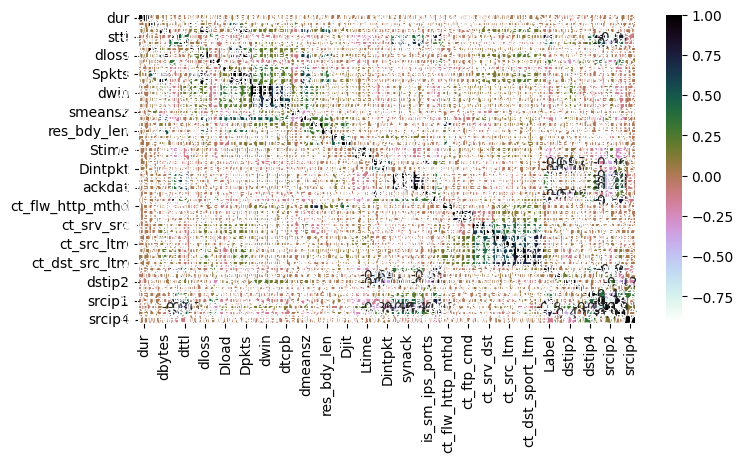

In [9]:
numerical_ids = ids.select_dtypes(include=np.number)

plt.figure(figsize=(8, 4))
sns.heatmap(numerical_ids.corr(), annot=True, cmap='cubehelix_r')
print('Heat-Map')
plt.show()

In [8]:
train,test = train_test_split(ids,test_size = 0.3)
print(train.shape)
print(test.shape)

(490000, 55)
(210000, 55)


In [9]:
train_X = train[['sport', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label','dstip1',
'dstip2','dstip3','dstip4','srcip1','srcip2','srcip3','srcip4']]
train_y = train.Label

test_X = test[[ 'sport', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label','dstip1',
'dstip2','dstip3','dstip4','srcip1','srcip2','srcip3','srcip4']]
test_y = test.Label

In [30]:
train_X.head()

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,attack_cat,Label,dstip1,dstip2,dstip3,dstip4,srcip1,srcip2,srcip3,srcip4
395124,32509,53,udp,CON,0.001020,130,162,31,29,0,...,NaN,0,149,171,126,6,59,166,0,2
195679,37611,64242,tcp,FIN,0.038628,3614,49342,31,29,7,...,NaN,0,149,171,126,7,59,166,0,9
80662,49472,2134,tcp,FIN,0.098275,4424,2560,31,29,7,...,NaN,0,149,171,126,5,59,166,0,0
217586,51470,53,udp,CON,0.001071,146,178,31,29,0,...,NaN,0,149,171,126,6,59,166,0,9
9411,37397,22173,tcp,FIN,0.100308,5174,83812,31,29,7,...,NaN,0,149,171,126,7,59,166,0,7


In [31]:
test_X.head()

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,attack_cat,Label,dstip1,dstip2,dstip3,dstip4,srcip1,srcip2,srcip3,srcip4
484029,54921,111,udp,CON,0.004657,568,312,31,29,0,...,NaN,0,149,171,126,4,59,166,0,9
602939,36613,40673,tcp,FIN,0.010035,2334,17532,31,29,7,...,NaN,0,149,171,126,0,59,166,0,4
120037,22738,80,tcp,FIN,1.218805,1684,10168,31,29,3,...,NaN,0,149,171,126,0,59,166,0,4
472791,17656,37254,tcp,FIN,0.078203,3302,37226,31,29,7,...,NaN,0,149,171,126,3,59,166,0,9
440113,60292,25,tcp,FIN,0.471835,37252,3380,31,29,18,...,NaN,0,149,171,126,7,59,166,0,9


In [32]:
train_X.head()

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,attack_cat,Label,dstip1,dstip2,dstip3,dstip4,srcip1,srcip2,srcip3,srcip4
395124,32509,53,udp,CON,0.001020,130,162,31,29,0,...,NaN,0,149,171,126,6,59,166,0,2
195679,37611,64242,tcp,FIN,0.038628,3614,49342,31,29,7,...,NaN,0,149,171,126,7,59,166,0,9
80662,49472,2134,tcp,FIN,0.098275,4424,2560,31,29,7,...,NaN,0,149,171,126,5,59,166,0,0
217586,51470,53,udp,CON,0.001071,146,178,31,29,0,...,NaN,0,149,171,126,6,59,166,0,9
9411,37397,22173,tcp,FIN,0.100308,5174,83812,31,29,7,...,NaN,0,149,171,126,7,59,166,0,7


In [33]:
train_y.head()

395124    0
195679    0
80662     0
217586    0
9411      0
Name: Label, dtype: int64

In [34]:
test_y.head()

484029    0
602939    0
120037    0
472791    0
440113    0
Name: Label, dtype: int64

In [10]:
!pip install category_encoders

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics



# Identify categorical columns
categorical_cols = train_X.select_dtypes(include=['object']).columns

# Converting categorical columns to strings
for col in categorical_cols:
    train_X[col] = train_X[col].astype(str)
    test_X[col] = test_X[col].astype(str)

# Combine datasets to ensure all categories are encoded
full_dataset = pd.concat([train_X[categorical_cols], test_X[categorical_cols]], axis=0)

# Applying Label Encoding on combined dataset
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(full_dataset[col])
    train_X[col] = le.transform(train_X[col])
    test_X[col] = le.transform(test_X[col])

# Applying imputer to handle missing values
imputer = SimpleImputer(strategy='most_frequent')
train_X = pd.DataFrame(imputer.fit_transform(train_X), columns=train_X.columns)
test_X = pd.DataFrame(imputer.transform(test_X), columns=test_X.columns)

# Checking for non-numeric data in numeric columns and convert
numeric_cols = train_X.select_dtypes(exclude=['object']).columns
for col in numeric_cols:
    try:
        train_X[col] = train_X[col].astype(float)
        test_X[col] = test_X[col].astype(float)
    except ValueError as e:
        print(f"Error converting column {col} to float: {e}")
        # Investigate values that cannot be converted and handle them as needed
        train_X[col] = pd.to_numeric(train_X[col], errors='coerce')
        test_X[col] = pd.to_numeric(test_X[col], errors='coerce')

# Checking dataset consistency and fill any NaNs produced in the conversion
train_X.fillna(0, inplace=True)
test_X.fillna(0, inplace=True)

# Ensuring train and test datasets have the same columns in the same order
missing_cols = set(train_X.columns) - set(test_X.columns)
for col in missing_cols:
    test_X[col] = 0
test_X = test_X[train_X.columns]

# Train and evaluate the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

# Print evaluation metrics
print('Accuracy:', metrics.accuracy_score(prediction, test_y))
expected = train_y
predicted = model.predict(train_X)
print('Classification report:')
print(metrics.classification_report(expected, predicted))
print('Confusion matrix:')
print(metrics.confusion_matrix(expected, predicted))



Error converting column sport to float: could not convert string to float: '0x000c'
Accuracy: 0.9662666666666667
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    474328
           1       0.45      0.27      0.34     15672

    accuracy                           0.97    490000
   macro avg       0.71      0.63      0.66    490000
weighted avg       0.96      0.97      0.96    490000

Confusion matrix:
[[469275   5053]
 [ 11496   4176]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


ids = pd.read_csv("UNSW-NB15_1.csv", low_memory=False)

# Preprocess data
# Example column names, replace with your actual names
train_X, train_y = ids.iloc[:490000, :-1], ids.iloc[:490000, -1]
test_X, test_y = ids.iloc[490000:, :-1], ids.iloc[490000:, -1]

# Identify categorical columns
categorical_cols = train_X.select_dtypes(include=['object']).columns

# Frequency Encoding for categorical data
for col in categorical_cols:
    frequency = train_X[col].value_counts() / len(train_X)
    train_X[col] = train_X[col].map(frequency)
    test_X[col] = test_X[col].map(frequency)

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
train_X = pd.DataFrame(imputer.fit_transform(train_X), columns=train_X.columns)
test_X = pd.DataFrame(imputer.transform(test_X), columns=test_X.columns)

# Converting target to integers if necessary (replace 'Label' with your target column name)
if train_y.dtype == 'object':
    label_encoder = LabelEncoder()
    train_y = label_encoder.fit_transform(train_y)
    test_y = label_encoder.transform(test_y)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(train_X, train_y)

# Making predictions and print evaluation metrics
prediction = model.predict(test_X)
print('Accuracy:', metrics.accuracy_score(test_y, prediction))

# Evaluating on training data as well
expected = train_y
predicted = model.predict(train_X)
print('Classification report:')
print(metrics.classification_report(expected, predicted))
print('Confusion Matrix:')
print(metrics.confusion_matrix(expected, predicted))



Accuracy: 0.9993
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    467785
           1       0.45      0.26      0.33     22215

    accuracy                           0.95    490000
   macro avg       0.71      0.62      0.65    490000
weighted avg       0.94      0.95      0.95    490000

Confusion Matrix:
[[460652   7133]
 [ 16358   5857]]


In [ ]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# Separating high-cardinality and low-cardinality categorical columns
high_cardinality_cols = [col for col in train_X.select_dtypes(include=['object']).columns if train_X[col].nunique() > 10]
low_cardinality_cols = [col for col in train_X.select_dtypes(include=['object']).columns if train_X[col].nunique() <= 10]

# Applying Target Encoding to high-cardinality columns
target_encoder = ce.TargetEncoder(cols=high_cardinality_cols)
train_X_encoded = target_encoder.fit_transform(train_X, train_y)
test_X_encoded = target_encoder.transform(test_X)

# Applying Label Encoding or OneHotEncoding to low-cardinality columns
label_encoder = LabelEncoder()
for col in low_cardinality_cols:
    train_X_encoded[col] = label_encoder.fit_transform(train_X[col])
    test_X_encoded[col] = label_encoder.transform(test_X[col])

# Imputing missing values if any
imputer = SimpleImputer(strategy='most_frequent')
train_X_encoded = pd.DataFrame(imputer.fit_transform(train_X_encoded), columns=train_X_encoded.columns)
test_X_encoded = pd.DataFrame(imputer.transform(test_X_encoded), columns=test_X_encoded.columns)

# Defining and train the KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X_encoded, train_y)

# Making predictions and evaluate
prediction = model.predict(test_X_encoded)
print('Accuracy:', metrics.accuracy_score(prediction, test_y))

# Additional performance metrics
expected = train_y
predicted = model.predict(train_X_encoded)
print('Classification Report:')
print(metrics.classification_report(expected, predicted))
print('Confusion Matrix:')
print(metrics.confusion_matrix(expected, predicted))


Accuracy: 0.9835333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    474446
           1       0.90      0.79      0.84     15554

    accuracy                           0.99    490000
   macro avg       0.95      0.89      0.92    490000
weighted avg       0.99      0.99      0.99    490000

Confusion Matrix:
[[473068   1378]
 [  3309  12245]]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn import metrics

# Ensure train_X, test_X, train_y, and test_y are appropriately loaded

# Identify categorical columns
categorical_cols = train_X.select_dtypes(include=['object']).columns

# Convert categorical columns to strings
for col in categorical_cols:
    train_X[col] = train_X[col].astype(str)
    test_X[col] = test_X[col].astype(str)

# Combine datasets to ensure all categories are encoded
full_dataset = pd.concat([train_X[categorical_cols], test_X[categorical_cols]], axis=0)

# Apply Label Encoding on combined dataset
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(full_dataset[col])
    train_X[col] = le.transform(train_X[col])
    test_X[col] = le.transform(test_X[col])

# Apply imputer to handle missing values
imputer = SimpleImputer(strategy='most_frequent')
train_X = pd.DataFrame(imputer.fit_transform(train_X), columns=train_X.columns)
test_X = pd.DataFrame(imputer.transform(test_X), columns=test_X.columns)

# Check for non-numeric data in numeric columns and convert
numeric_cols = train_X.select_dtypes(exclude=['object']).columns
for col in numeric_cols:
    try:
        train_X[col] = train_X[col].astype(float)
        test_X[col] = test_X[col].astype(float)
    except ValueError as e:
        print(f"Error converting column {col} to float: {e}")
        train_X[col] = pd.to_numeric(train_X[col], errors='coerce')
        test_X[col] = pd.to_numeric(test_X[col], errors='coerce')

# Check dataset consistency and fill any NaNs produced in the conversion
train_X.fillna(0, inplace=True)
test_X.fillna(0, inplace=True)

# Ensure train and test datasets have the same columns in the same order
missing_cols = set(train_X.columns) - set(test_X.columns)
for col in missing_cols:
    test_X[col] = 0
test_X = test_X[train_X.columns]

# Train and evaluate the SVM model
model = SVC(gamma='auto')
model.fit(train_X, train_y)
prediction = model.predict(test_X)

# Print evaluation metrics
print('Accuracy:', metrics.accuracy_score(prediction, test_y))

# Evaluate on training data for performance metrics
expected = train_y
predicted = model.predict(train_X)
print('Classification report:')
print(metrics.classification_report(expected, predicted))
print('Confusion matrix:')
print(metrics.confusion_matrix(expected, predicted))